In [1]:
import datetime
import pandas as pd
import numpy as np
from pandas import DataFrame
%matplotlib inline

In [2]:
df = pd.read_csv('experiments_results_01.csv') 

In [3]:
df.drop('Balanced', axis=1, inplace=True)
df.drop('Backup', axis=1, inplace=True)
df.head()

,Nodes,Agents,SmallTasks,MedTasks,BigTasks,Order,Cooperation,Time
0,2,15000,2500,1000,5000,1,1,12613
1,2,15000,1000,1000,1000,1,1,8802
2,4,15000,1000,2500,1000,0,0,8986
3,2,100,1000,5000,2500,1,0,3505
4,1,100,1000,1000,5000,0,0,2162


In [4]:
df.describe()

,Nodes,Agents,SmallTasks,MedTasks,BigTasks,Order,Cooperation,Time
count,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3888.000000,3.888000e+03
mean,2.333333,6700.000000,2833.333333,2833.333333,2833.333333,0.500000,0.500000,1.122158e+04
std,1.247380,6201.335159,1650.128044,1650.128044,1650.128044,0.500064,0.500064,1.639445e+05
min,1.000000,100.000000,1000.000000,1000.000000,1000.000000,0.000000,0.000000,1.834000e+03
25%,1.000000,100.000000,1000.000000,1000.000000,1000.000000,0.000000,0.000000,3.883500e+03
50%,2.000000,5000.000000,2500.000000,2500.000000,2500.000000,0.500000,0.500000,6.313000e+03
75%,4.000000,15000.000000,5000.000000,5000.000000,5000.000000,1.000000,1.000000,1.012825e+04
max,4.000000,15000.000000,5000.000000,5000.000000,5000.000000,1.000000,1.000000,7.257015e+06


In [5]:
result_df1 = df[df.Cooperation.eq(0)]
result_df1 = result_df1.groupby(["Nodes", "Agents","SmallTasks","MedTasks","BigTasks","Order","Cooperation"], as_index=False).mean().groupby(["Agents","Nodes"])['Time'].mean()

In [6]:
result_df2 = df[df.Cooperation.eq(1)]
result_df2 = result_df2.groupby(["Nodes", "Agents","SmallTasks","MedTasks","BigTasks","Order","Cooperation"], as_index=False).mean().groupby(["Agents","Nodes"])['Time'].mean()

In [7]:
result_df3 = df[df.Order.eq(0)]
result_df3 = result_df3.groupby(["Nodes", "Agents","SmallTasks","MedTasks","BigTasks","Order","Cooperation"], as_index=False).mean().groupby(["Agents","Nodes","Order"])['Time'].mean()

In [8]:
result_df4 = df[df.Order.eq(1)]
result_df4 = result_df4.groupby(["Nodes", "Agents","SmallTasks","MedTasks","BigTasks","Order","Cooperation"], as_index=False).mean().groupby(["Agents","Nodes","Order"])['Time'].mean()

In [9]:
#Sin Cooperación
result_df1

Agents  Nodes
100     1         2528.203704
        2         2681.162037
        4         3283.347222
5000    1         6411.925926
        2        72187.736111
        4         7198.763889
15000   1        17491.523148
        2        10995.171296
        4        11058.712963
Name: Time, dtype: float64

In [10]:
#Con Cooperación
result_df2

Agents  Nodes
100     1         3248.111111
        2         3804.282407
        4         5077.296296
5000    1         5772.847222
        2         6908.078704
        4         8722.222222
15000   1         9493.416667
        2        11021.750000
        4        14103.925926
Name: Time, dtype: float64

In [11]:
result_df3

Agents  Nodes  Order
100     1      0         2712.134259
        2      0         3098.560185
        4      0         4032.962963
5000    1      0         5983.800926
        2      0         5903.694444
        4      0         7180.259259
15000   1      0        13294.472222
        2      0        10814.027778
        4      0        12253.009259
Name: Time, dtype: float64

In [12]:
result_df4

Agents  Nodes  Order
100     1      1         3064.180556
        2      1         3386.884259
        4      1         4327.680556
5000    1      1         6200.972222
        2      1        73192.120370
        4      1         8740.726852
15000   1      1        13690.467593
        2      1        11202.893519
        4      1        12909.629630
Name: Time, dtype: float64

<AxesSubplot:xlabel='Agents,Nodes'>

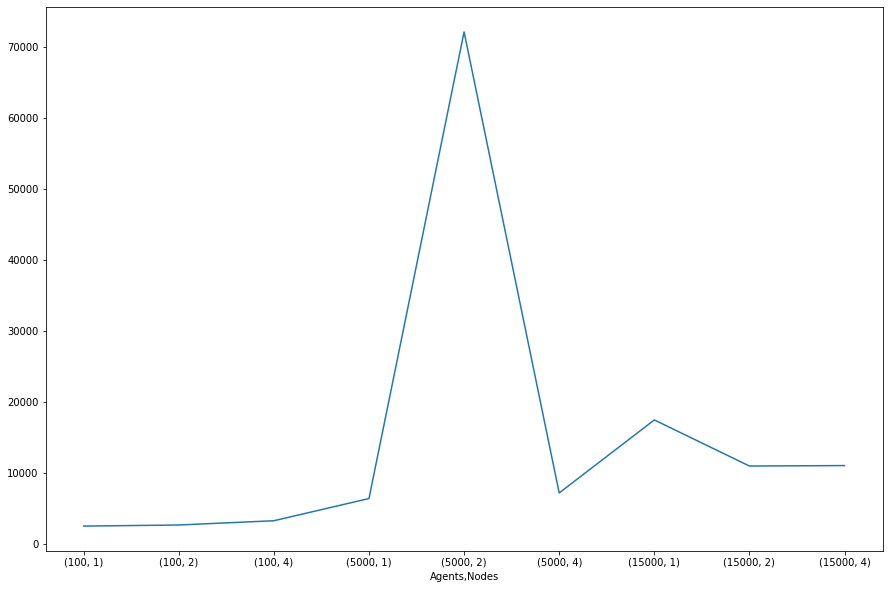

In [13]:
result_df1.plot(figsize=(15,10))

<AxesSubplot:xlabel='Agents,Nodes'>

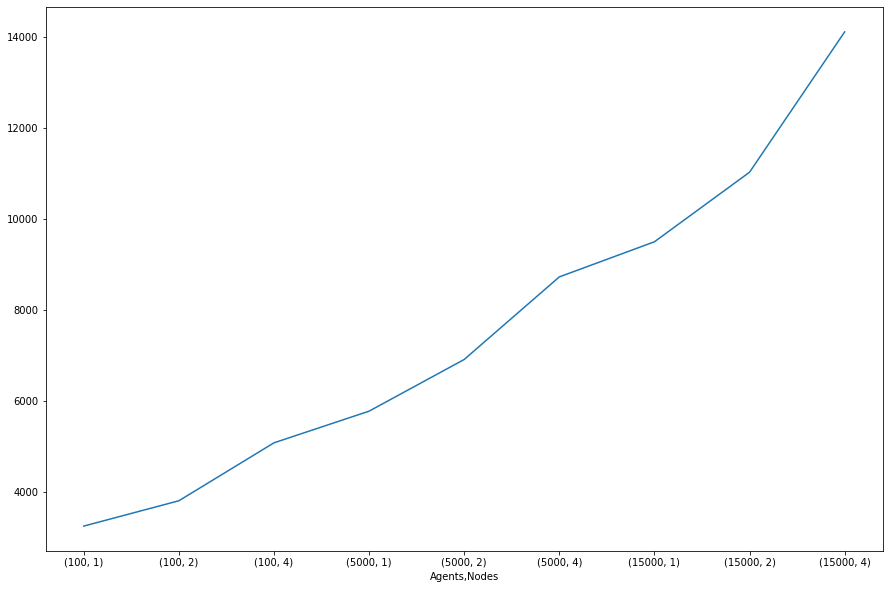

In [14]:
result_df2.plot(figsize=(15,10))

<AxesSubplot:xlabel='Agents,Nodes,Order'>

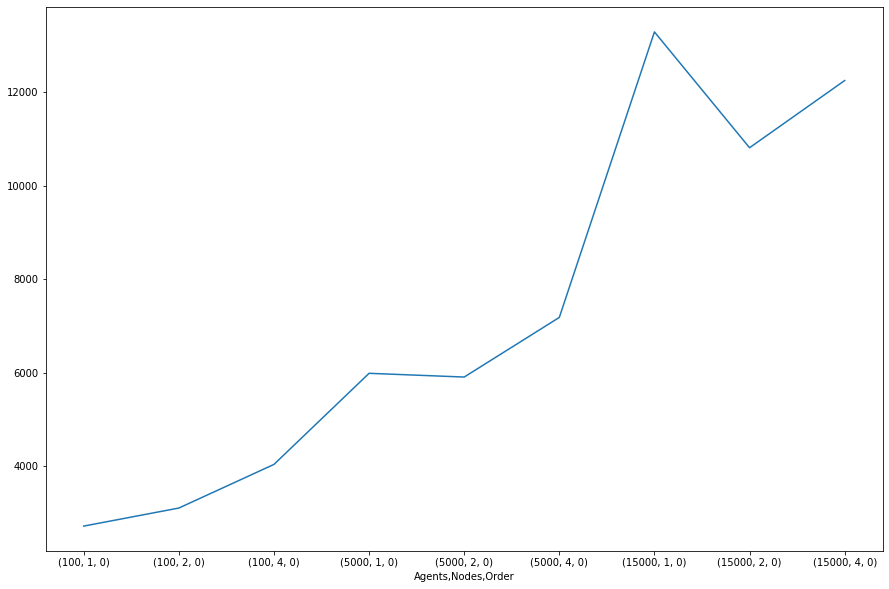

In [15]:
result_df3.plot(figsize=(15,10))

<AxesSubplot:xlabel='Agents,Nodes,Order'>

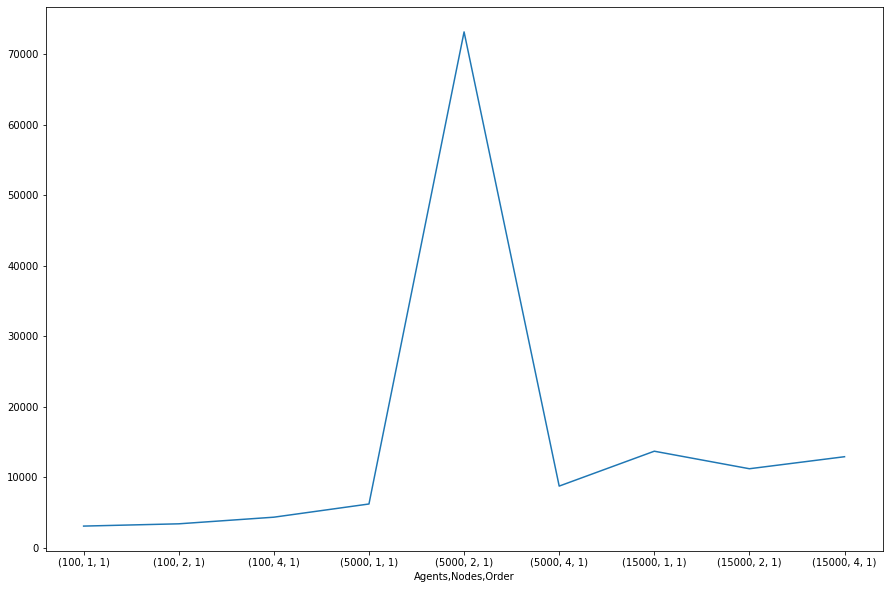

In [16]:
result_df4.plot(figsize=(15,10))